Make and train the model

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2023-05-20 16:31:58.230994: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Load the data


In [2]:
#Train data
npz = np.load('../../data/preprocessed/data_train.npz')
train_inputs, train_targets = npz['inputs'].astype(np.float64), npz['targets'].astype(np.int64)

#Validation data
npz = np.load('../../data/preprocessed/data_validation.npz')
validation_inputs, validation_targets = npz['inputs'].astype(np.float64), npz['targets'].astype(np.int64)

#Test data
npz = np.load('../../data/preprocessed/data_test.npz')
test_inputs, test_targets = npz['inputs'].astype(np.float64), npz['targets'].astype(np.int64)

Make the model

In [4]:
#Define the model
model = tf.keras.models.Sequential([
   tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)), #Convolutional layer
    tf.keras.layers.MaxPooling2D(2,2), #Maximum pooling layer with 32 filter
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)), #Convolutional layer
    tf.keras.layers.MaxPooling2D(2,2), #Maximum pooling layer with 64 filter
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(28, 28, 1)), #Convolutional layer
    tf.keras.layers.MaxPooling2D(2,2), #Maximum pooling layer with 128 filter
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(20, activation='relu'), #Convolutional layer
    tf.keras.layers.Dense(10, activation='softmax'),
])

#Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Train the model

In [5]:
BATCH_SIZE = 32 
MAX_EPOCHS = 10

early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)
record = model.fit(
    train_inputs,
    train_targets,
    batch_size=BATCH_SIZE,
    epochs=MAX_EPOCHS,
    validation_data=(validation_inputs, validation_targets),
    steps_per_epoch=int(np.ceil(len(train_inputs)) / float(32)),
    validation_steps=int(np.ceil(len(validation_inputs)) / float(32)),
    callbacks=[early_stopping],
    verbose=2
    )

Epoch 1/50
1593/1593 - 27s - loss: 0.2611 - accuracy: 0.9176 - val_loss: 0.1513 - val_accuracy: 0.9524 - 27s/epoch - 17ms/step
Epoch 2/50
1593/1593 - 25s - loss: 0.0828 - accuracy: 0.9741 - val_loss: 0.0788 - val_accuracy: 0.9773 - 25s/epoch - 16ms/step
Epoch 3/50
1593/1593 - 25s - loss: 0.0585 - accuracy: 0.9818 - val_loss: 0.0591 - val_accuracy: 0.9820 - 25s/epoch - 16ms/step
Epoch 4/50
1593/1593 - 26s - loss: 0.0462 - accuracy: 0.9858 - val_loss: 0.0496 - val_accuracy: 0.9839 - 26s/epoch - 16ms/step
Epoch 5/50
1593/1593 - 26s - loss: 0.0347 - accuracy: 0.9892 - val_loss: 0.0604 - val_accuracy: 0.9831 - 26s/epoch - 17ms/step
Epoch 6/50
1593/1593 - 25s - loss: 0.0279 - accuracy: 0.9914 - val_loss: 0.0512 - val_accuracy: 0.9862 - 25s/epoch - 16ms/step
Epoch 7/50
1593/1593 - 28s - loss: 0.0243 - accuracy: 0.9923 - val_loss: 0.0626 - val_accuracy: 0.9828 - 28s/epoch - 17ms/step
Epoch 8/50
1593/1593 - 25s - loss: 0.0191 - accuracy: 0.9937 - val_loss: 0.0501 - val_accuracy: 0.9873 - 25s/ep

Explore the train

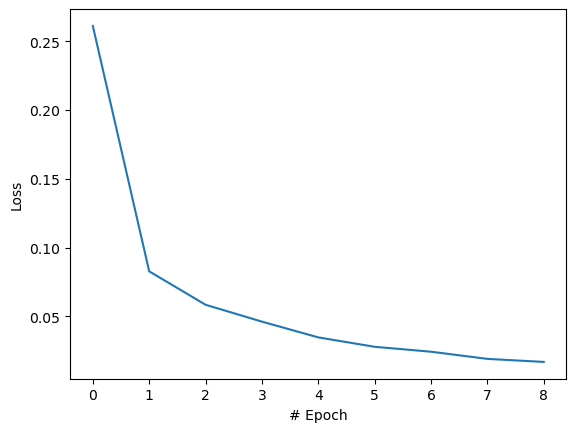

In [6]:
#Show the loss between epochs 
plt.plot(record.history['loss'])
plt.xlabel('# Epoch')
plt.ylabel('Loss')
plt.show()

Evaluate model

In [7]:
model.evaluate(test_inputs, test_targets)

313/313 [==============================] - 2s 5ms/step - loss: 0.0589 - accuracy: 0.9855


[0.05894671007990837, 0.9854999780654907]

Save the model

In [8]:
model.save('./trained_model/mnist_cnn_model.h5')